### Introduction
- A data analyst is someone who uses data to answer questions
- They tackle questons like;
    * What characteristics make a tumor more likely to be cancerous
    * How much of car models improved since 2008 and which vehicles improved the most
    * How does wine quality vary by type, alcohol content, sugar, acidity level and much more?
- Libraries for data analysis in python; Numpy, Pandas, Matplotlib

### The data analysis process
1. Question
    - Sometimes you are already given a dataset and glance over to figure out which questions to ask
    - Other times your questions come first which will determine what kinds of data you'll gather later
    - In both cases you should be thinking what you are trying to find out, is there a problem you are trying to solve?
    - The right questions can really help you focus on relevant parts of your data and direct your analysis towards meaningful insights
    - Once you have your questions you'll need to wrangle your data to help you answer them

2. Wrangle
    - Gather you data, if given already open it like import it into jupyter notebook
    - If you weren't provided data you need to think carefully about what data would be most helpful in answering your questions and then collect them from all sources available
    - Access your data to identify any problems in your data's quality or structure
    - Clean your data (modifying, replacing or moving data to ensure that your dataset is as high quality and well structured as possible)
    - Wrangling is all about getting the data you need in a form you can work with

3. Explore
    - EDA or explaratory data analysis is about exploring and the augmenting your data to maximize the potential of your analyses, visualizations and models
    - Exploring involves finding patterns in your data, visualizing relationships in your data and just building intuition about what you are working with
    - After exploring you can remove outliers and create new and more descriptive features from existing data also known as feature engineering
    - As you become more familiar with your data you'll often revisit previous steps, i.e you might discover new problems in your data and go back to wrangle them
    - Or you might find exciting unexpected patterns and decide to refine your questions. The data analysis process isn't always linear
    - The explaratory process in particular is very intertwined with the rest of the process, its where you discover and learn the most about your data

4. Draw conclusions
    - After you're done with wrangling you'll want to draw conclusions or even make predictions
        * predicting which students will fail a project so you can reach out to those students
        * predicting which products are most likely to sell so you can stock your store appropriately
    - From a data science perspective this step is typically approached with __machine learning__ or __inferential statistics__
    - Those two are beyond the scope of this course
    - This course will help you form a solid foundation and draw conclusions from summarizing data with __descriptive statistics__

5. Communicate
    - Finally you need to communicate your results to others
    - Your analysis is only as valuable as your ability to communicate it
    - You often need to justify and convey meaning in the insights you found or if your end goal is to build a system (movie recommender or a news feed ranking algorithm) you usually need to share what you've built, explain how you reach design decisions and report how well it performs
    - You can communicate results in many ways; reports, _slide decks blog posts, emails, presentatons or even conversations_
    - Regardless of your methods of communication __datavisualization__ will always be very valuable

- Before jumping into how to go through this process on a real data set in python we are going to work on building intuition for each step

### Packages Overview
- A package is a collection of modules or python files that we can import into our code
- Libraries of useful classes and functions we can use
- Importing packages is typically done at the beginning of files
- __Numpy__ - lets you perform mathematical functions on large multidimensional arrays and matrices efficiently
- __Pandas__ - more powerful and flexible version of Excel that can handle large amounts of data
- __Matplotlib__ - plotting library that can produce great visualizations often with very few lines of code

In [27]:
import numpy as np
import pandas as pd

In [8]:
counts = [23, 45, 67, 23]
mean = np.mean(counts)
logs = np.log(counts)
cosines = np.cos(counts)
print(mean)
print(logs)
print(cosines)

39.5
[3.13549422 3.80666249 4.20469262 3.13549422]
[-0.53283302  0.52532199 -0.5177698  -0.53283302]


### Waiter tips dataset
- One waiter recorded information about each tip he received over a period of afew months working in one restaurant. In all he recorded 244 tips

#### Some details
- total bill : a numeric vector, the bill amount (dollars)
- tip : a numeric vector, the tip amount (dollars)
- sex : a factor with levels Female Male, gender of the payer of the bill
- smoker : a factor with levels No Yes, whether the party included smokers
- day : a factor with levels Friday Saturday Sunday Thursday, day of the week
- time : a factor with levels Day Night, rough time of day
- size : a numeric vector, number of people in party

In [3]:
# loads tips data into dataframe
df = pd.read_csv("tips.csv")
# returns the first few lines of the dataframe, by default it returns five
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [7]:
# print the column tables in the dataframe
for x, y in enumerate(df.columns):
    print(x, y)

0 total_bill
1 tip
2 sex
3 smoker
4 day
5 time
6 size
7 price_per_person
8 Payer Name
9 CC Number
10 Payment ID


### Questions
__What are good questions you can ask based on this information__
1. Does gender affect tip size
2. How does the tip amount vary by size, total bill and price per person? 

---
_Things to think about_

How would you go about answering these questions? whichparts of the dataset might you use for each one?

---


### Gathering
- Daata acquisition can happen in a variety of ways; downloading from available files, scrapping from a webpage, getting from an API
- In  many companies they might have an existing database from which you can pull data and answer questions
- You'll also need to combine data from multiple different formats. Our file is in a `csv` format (Comma Separated Values)
- A csv file is a tet file, its similar to a spreadsheet in terms of its tabular structure but they hold only the raw data. Its contents are easy to process manually using code

### Reading csv files
- `read_csv` is used to load data from a csv file into a Pandas dataframe. We just need to specify the file path of our data
- `head()` is a useful function you can call on your dataframe to display the first few rows
- Though csv stands for comma separated values they can be separated by different characters, tabs, whitespaces etc

In [5]:
df = pd.read_csv("tips.csv", sep=";") 
df.head()
# did not work because our csv is separated by commas. Baecause there are no colons, nothing was separated and everything was read into one column


,"total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID"
0,"16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy..."
1,"10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas T..."
2,"21.01,3.5,Male,No,Sun,Dinner,3,7.0,Travis Walt..."
3,"23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathanie..."
4,"24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya C..."


### Headers
- With `read_csv` you can specify which line of the file is the header, which specifies the column labels
- Its usually the first line, but sometimes we'll want to specify a later line if there is extra meta information at the top of the file
- In the code below row 4 was used as the header and everything above that was cut off

In [6]:
# By default read_csv uses header=0 which uses the first line for column labels
df = pd.read_csv("tips.csv", header=4)
df.head()

,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
0,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
1,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
2,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
3,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157
4,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820


In [4]:
# If colum labels are not included in your file you can use "header=None" to prevent your first line of data from being misinterpreted as column labels
df = pd.read_csv("tips.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
3,21.01,3.5,Male,No,Sun,Dinner,3,7.0,Travis Walters,6011812112971322,Sun4458
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260


In [11]:
# You can also specify your own column labels
labels = ["total_bill", "Tip", "Gender", "Smoker", "Day of the week", "Time", "Size of party", "price_per_person", "payer_name", "CC NUmber", "payment_ID"]
df = pd.read_csv("tips.csv", names=labels)
df.head()

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person,payer_name,CC NUmber,payment_ID
0,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
3,21.01,3.5,Male,No,Sun,Dinner,3,7.0,Travis Walters,6011812112971322,Sun4458
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260


In [14]:
# If you want to tell pandas that there was a header line that you are replacing
labels = ["total_bill", "Tip", "Gender", "Smoker", "Day of the week", "Time", "Size of party", "price_per_person", "payer_name", "CC NUmber", "payment_ID"]
df = pd.read_csv("tips.csv", header=0, names=labels)
df.head()


,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person,payer_name,CC NUmber,payment_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [16]:
# Instead of using the default index, you can specify one or more of your columns to be used as the default index
df = pd.read_csv("tips.csv", index_col="Payer Name")
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,CC Number,Payment ID
Payer Name,,,,,,,,,,
Christy Cunningham,16.99,1.01,Female,No,Sun,Dinner,2,8.49,3560325168603410,Sun2959
Douglas Tucker,10.34,1.66,Male,No,Sun,Dinner,3,3.45,4478071379779230,Sun4608
Travis Walters,21.01,3.50,Male,No,Sun,Dinner,3,7.00,6011812112971322,Sun4458
Nathaniel Harris,23.68,3.31,Male,No,Sun,Dinner,2,11.84,4676137647685994,Sun5260
Tonya Carter,24.59,3.61,Female,No,Sun,Dinner,4,6.15,4832732618637221,Sun2251


In [22]:
df = pd.read_csv("tips.csv", index_col=["Payer Name", "Payment ID"])
df.head()

,,total_bill,tip,sex,smoker,day,time,size,price_per_person,CC Number
Payer Name,Payment ID,,,,,,,,,
Christy Cunningham,Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,8.49,3560325168603410
Douglas Tucker,Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,3.45,4478071379779230
Travis Walters,Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,7.00,6011812112971322
Nathaniel Harris,Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,11.84,4676137647685994
Tonya Carter,Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,6.15,4832732618637221


In [5]:
# Writing csv files
labels = ["total_bill", "Tip", "Gender", "Smoker", "Day of the week", "Time", "Size of party", "price_per_person", "payer_name", "CC NUmber", "payment_ID"]
df = pd.read_csv("tips.csv", header=0, names=labels)
# to_csv will restore our index unless we tell it not to
df.to_csv('tips_edited.csv', index=False)
hotel_tips = pd.read_csv("tips_edited.csv")
hotel_tips.head()


,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person,payer_name,CC NUmber,payment_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


### Accessing and building intuition
- Once you have your loaded into dataframes, Pandas makes a quick investigation of the data really easy


In [10]:
# returns a tuple of the dimensions of the data frame
hotel_tips.shape

(244, 11)

In [12]:
# returns the datatypes of the columns
hotel_tips.dtypes


total_bill          float64
Tip                 float64
Gender               object
Smoker               object
Day of the week      object
Time                 object
Size of party         int64
price_per_person    float64
payer_name           object
CC NUmber             int64
payment_ID           object
dtype: object

In [16]:
# although the datatype of the Gender appears to be an object, further investigation shows it is a string
type(hotel_tips['Gender'][0])

str

- Pandas stores `pointers` to strings in dataframes and series which is why `object` instead of `str` appears as the datatype
- Understanding this is not essential for data analysis, just know that strings will appear as objects in Pandas

In [18]:
# displays a concise summary of the dataframe, including the number of non values in each column
hotel_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   Tip               244 non-null    float64
 2   Gender            244 non-null    object 
 3   Smoker            244 non-null    object 
 4   Day of the week   244 non-null    object 
 5   Time              244 non-null    object 
 6   Size of party     244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   payer_name        244 non-null    object 
 9   CC NUmber         244 non-null    int64  
 10  payment_ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [19]:
# returns the number of unique values in each column
hotel_tips.nunique()

total_bill          229
Tip                 123
Gender                2
Smoker                2
Day of the week       4
Time                  2
Size of party         6
price_per_person    217
payer_name          244
CC NUmber           244
payment_ID          243
dtype: int64

In [20]:
# returns useful descriptive statistics for each column of data
hotel_tips.describe()

,total_bill,Tip,Size of party,price_per_person,CC NUmber
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [21]:
# specifying how many rows you want defined
hotel_tips.head(20)

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person,payer_name,CC NUmber,payment_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775


In [22]:
# tail returns the last few rows
hotel_tips.tail(3)

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person,payer_name,CC NUmber,payment_ID
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17
243,18.78,3.00,Female,No,Thur,Dinner,2,9.39,Michelle Hardin,3511451626698139,Thur672


### Indexing and selecting data in pandas
- separating the dataframe into three new dataframes, one for each metric (mean, standard error and maximum)

In [23]:
# view the index number and label for each column
for m, n in enumerate(hotel_tips.columns):
    print(m, n)

0 total_bill
1 Tip
2 Gender
3 Smoker
4 Day of the week
5 Time
6 Size of party
7 price_per_person
8 payer_name
9 CC NUmber
10 payment_ID


- We can select data using `loc` and `iloc`
- Loc uses labels of rows or columns to select data while iloc uses the index numbers

In [24]:
# selecting all the columns from total_bill to price_per_person
df_means = df.loc[:, 'total_bill':'price_per_person']
df_means.head()

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [27]:
# repeat the step above using index numbers
df_means = df.iloc[:, 0:8]
df_means.head()

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [28]:
# lets save the dataframe of means for use in a future notebook
df_means.to_csv("tips_data_means.csv", index=False)
tips_means = pd.read_csv("tips_data_means.csv")
tips_means.head()

,total_bill,Tip,Gender,Smoker,Day of the week,Time,Size of party,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


### Selecting Multiple Ranges in Pandas
- selecting the columns for the mean dataframe was straight forward, the columns we needed to select were all together

In [35]:
multiple_ranges = df_means.iloc[:, np.r_[:3, 4, 6, 7]]
multiple_ranges.head(10)


,total_bill,Tip,Gender,Day of the week,Size of party,price_per_person
0,16.99,1.01,Female,Sun,2,8.49
1,10.34,1.66,Male,Sun,3,3.45
2,21.01,3.50,Male,Sun,3,7.00
3,23.68,3.31,Male,Sun,2,11.84
4,24.59,3.61,Female,Sun,4,6.15
5,25.29,4.71,Male,Sun,4,6.32
6,8.77,2.00,Male,Sun,2,4.38
7,26.88,3.12,Male,Sun,4,6.72
8,15.04,1.96,Male,Sun,2,7.52
9,14.78,3.23,Male,Sun,2,7.39


In [5]:
# checking for columns that have missing values
df.columns[df.isnull().any()]

Index(['total_bill', 'size', 'price_per_person'], dtype='object')

- After accessing you often need to fix problems in your data
- Common problems include incorrect data types, missing data and duplicates and structural problems such as different column names in csv files for the same data or mismatch number of records
* check for null values - `df.info()` or `isnull()`
* check for duplicates
* check for incorrect datatypes, i.e timestamp being represented as a string when ideally it should be represented as a date time object
- Missing data is an issue that should be handled separately depending on those factors such as the reson those values are missing and whether their occurences seem random
- One way of hanfling them is inputing them with the mean
- using means to fill in missing values
    ```python
    df.fillna(df.mean(), inplace=True)
    ```

In [19]:
edited_df = pd.read_csv("edited_tips.csv")
# getting the mean of the total_bill column
mean = df['total_bill'].mean()
# using pandas fillna function to replace all missing values with the mean
df["total_bill"].fillna(mean)
# it returns a new column with the changes which we didn't store anywhere, to keep the changes assign it to the original
df["total_bill"] = df["total_bill"].fillna(mean)
# alternatively you can use the inplace=True parameter to make the changes
df["total_bill"].fillna(mean, inplace=True)


#### Dealing with the problem of duplicate data
- There are multiple reasons to end up with duplicate data like combined data sources or human error
- In our dataset(tips.csv) rows 6 and 7 are identical. For bigger datasets you can use the duplicated function to see which rows are datasets

In [20]:
# marks duplicate as True excluding the first instance and it considers a value to be a duplicate only if the values and the columns match
edited_df.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [21]:
# getting a count of the duplicates in the dataset
sum(edited_df.duplicated())

1

In [24]:
# dropping duplicates
# we have to use the inplace parameter or assign the output to the original data frame when using this function
edited_df.drop_duplicates(inplace=True)
edited_df.head(10) # dropped row 5, the one marked as duplicate

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2.0,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3.0,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3.0,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2.0,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4.0,6.15,Tonya Carter,4832732618637221,Sun2251
6,25.29,4.71,Male,No,Sun,Dinner,4.0,6.32,Erik Smith,213140353657882,Sun9679
7,NaN,2.00,Male,No,Sun,Dinner,2.0,4.38,Kristopher Johnson,2223727524230344,Sun5985
8,26.88,3.12,Male,No,Sun,Dinner,4.0,NaN,Robert Buck,3514785077705092,Sun8157
9,15.04,1.96,Male,No,Sun,Dinner,NaN,7.52,Joseph Mcdonald,3522866365840377,Sun6820
10,14.78,3.23,Male,No,Sun,Dinner,2.0,7.39,Jerome Abbott,3532124519049786,Sun3775


- This was a simple situation where an entire row was identical, imagine duplicated data scenarios that are a bit more complicated
- What happens when you come across two roes with the same Payer Name but different data on the same day? Do you combine them? Only keep the latest one?
- This is a situation you'll have to investigate more
- For this scenario you'll only identify duplicates only based on the column recording the payer ID
- You can use a subset parameter in the duplicated and drop_duplicate functions to do this
- `df.duplicated(subset='Payer ID')` returns a boolean vector with True for rows that are duplicates

- __Addressing incorrect data types__
- In the event timestamps are represented as strings instead of datetimes, you can use the `df['timestamp'] = pd.to_datetime(df['timestamp'])` function to convert them to datetime objects
- It isn't a critical issue but datetimes are much more convenient to work with if you want to extract specific information from them or filter them more easily
- If you save to the csv file after making the change it will still be read as a string by deafult the next time you open it
- You'd have to convert it again after opening the csv file or use parameters like `parsedates` in the `read_csv` function

### Exploring data with visuals
- Now that you've cleaned your data you can find patterns in your data by creating plots
- Histograms and scatterplots can help you determine which variables will be used in analysis
- For example you can plot a histogram to view the distribution of temperatures or a scatter plot to view the relationship between temperature and energy output

### Plotting with Pandas
- The plot methods on a series or data frame are just simple wrappers around matplotlib functions
- Pandas is nice for quick insights but you'll need to use matplotlib to really dive into details and cutomize your visualizations
- Practising part of histograms, bar charts and pie charts in pandas
- the matplotlib inline statement lets you view your plots in the notebook
- A quick way to view histograms for all numerical columns in a data frame is the `hist` function which can be called directly on the pandas dataframe

In [2]:
import pandas as pd
%matplotlib inline

df_tips = pd.read_csv("tips.csv")
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'price_per_person'}>],
       [<AxesSubplot:title={'center':'CC Number'}>, <AxesSubplot:>]],
      dtype=object)

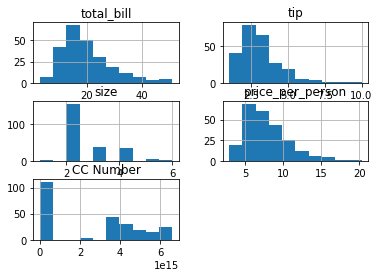

In [3]:
df_tips.hist()

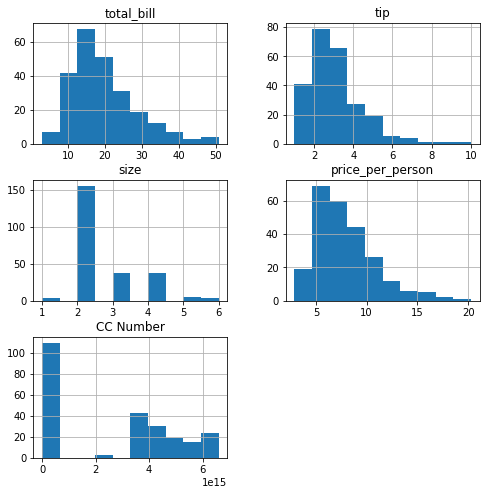

In [5]:
# making our figures size bigger
# tou can use semicolon to suppress unwanted output that appears before the plots
df_tips.hist(figsize=(8, 8));  # exploring data

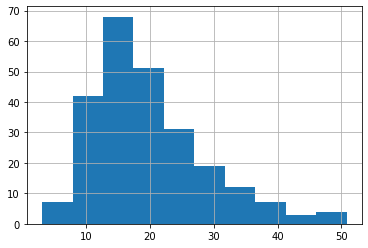

In [7]:
#  hist function can also be called on a pandas series object, so we can plot a histogram for one specific column
df_tips['total_bill'].hist();

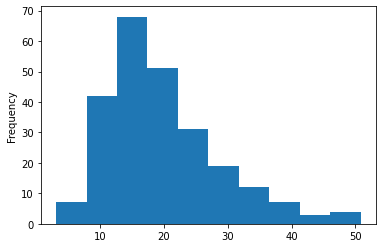

In [10]:
# using plot function instead of hist and specifying the type of plot in the parameter
df_tips['total_bill'].plot(kind='hist'); # plotting distribution of total_bill

In [14]:
# plotting a bar graph for the price_per_person column
# For this we need counts for each distinct value or bar
# value_counts function aggregates counts for each unique value in a column
df_tips['price_per_person'].value_counts().head(10)

10.14    3
6.71     3
6.50     2
5.80     2
9.39     2
6.64     2
9.68     2
6.02     2
6.23     2
6.97     2
Name: price_per_person, dtype: int64

<AxesSubplot:>

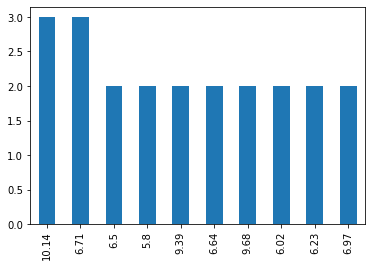

In [5]:
# calling the plot function on the above result tocreate a bar chart
df_tips['price_per_person'].value_counts().head(10).plot(kind='bar')

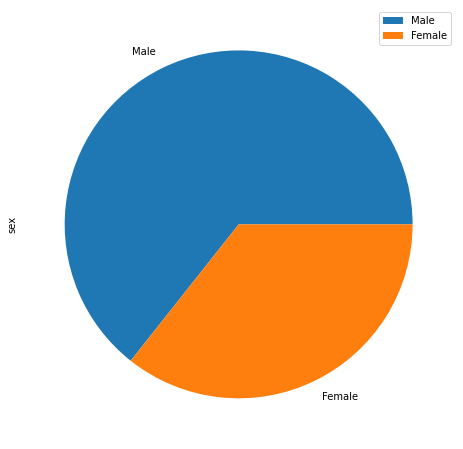

In [3]:
# we also need value_counts to plot pie charts
# creating a pie chart for the size of party columns
# legend() is reserved for labels
df_tips['sex'].value_counts().plot(kind='pie', figsize=(8, 8)).legend()

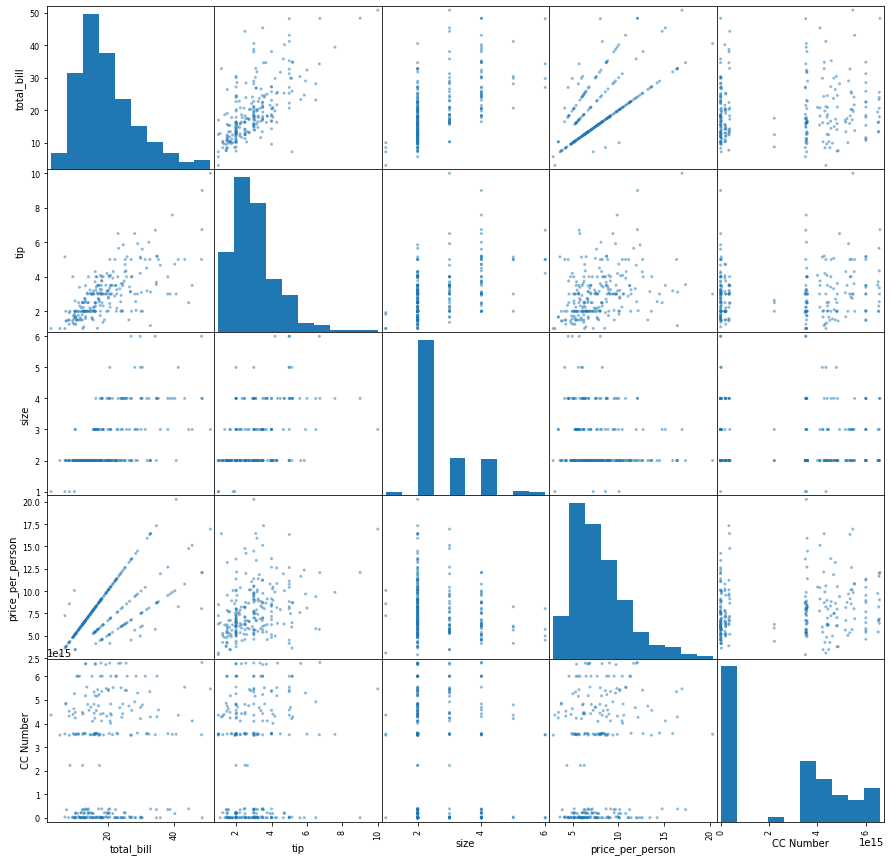

In [7]:
# plotting scatter plots and box plots
# Getting quick insights into the relationships among variables with scatter plots
# It also displays a histogram for each variable
pd.plotting.scatter_matrix(df_tips, figsize=(15, 15));

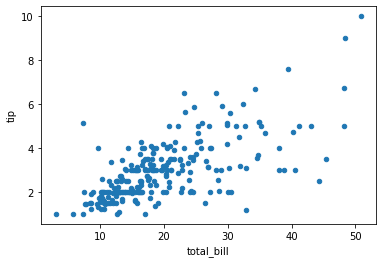

In [8]:
# We can create a single scatter plot using the standard plot function with parameters to specify the columns to be used for the x and y axes
df_tips.plot(x='total_bill', y='tip', kind='scatter');

### Box plots
- Box plots are used to show the overall patterns of response for a group
- They provide a useful way to visualize the range and other characteristics of responses for a large group
- They are a standard way of displaying the distribution of data based on a five number summary ("minimum", first quartile, median, third quartile, "maximum")

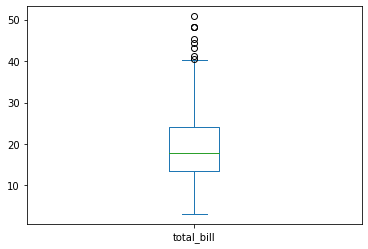

In [9]:
# the plot function can also be used to create a box plot
df_tips['total_bill'].plot(kind='box');

### Drawing conclusions
- Conclusions are typically drawn from machine learning algorithms or inferential statistics
- We will draw conclusions that can be made from descriptive statistics or visualizations

- __Using descriptive statistics and visualizations to address the question posed in the beginning of the project__
    * How does the tip amount vary by size, total bill and price per person? 
    * Does gender affect tip size

- For this we'd ideally compare the tip sizes of males with those of females
- We use `masks` to select all rows in the data frame whose gender was female and then all rows with male and put them in separate data frames
- Create a new data frame called __df_F__ that contains only females

In [22]:
# returning a pandas series of booleans indicating whether the value in the diagnosis column is equal to "Female"
import pandas as pd

df = pd.read_csv("tips.csv")
mask = df['sex'] == "Female"
print(mask)

0       True
1      False
2      False
3      False
4       True
       ...  
239    False
240     True
241    False
242    False
243     True
Name: sex, Length: 244, dtype: bool


In [5]:
# indexing the original data frame with Female returns all rows where the value of Female is true
df_F = df[df['sex'] == 'Female']
df_F.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
11,35.26,5.00,Female,No,Sun,Dinner,4,8.82,Diane Macias,4577817359320969,Sun6686
14,14.83,3.02,Female,No,Sun,Dinner,2,7.42,Vanessa Jones,30016702287574,Sun3848
16,10.33,1.67,Female,No,Sun,Dinner,3,3.44,Elizabeth Foster,4240025044626033,Sun9715


In [6]:
# Now that we have all the malignant tumord together in a data frame, let's see summary statistics about the party size feature which offers a good metric for gender
df_F['size'].describe()

count    87.000000
mean      2.459770
std       0.937644
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: size, dtype: float64

In [7]:
# Doing the same for all the Males
df_M = df[df['sex'] == 'Male']
df_M.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985


In [8]:
df_M['size'].describe()

count    157.000000
mean       2.630573
std        0.955997
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

- We can use the mean to compare these
- Although summary statistics like the mean are helpful, it would be nice to be able to compare the sizes of Male and Female visually
- An example of using matplotlib to create histograms for both distributions on the same plot

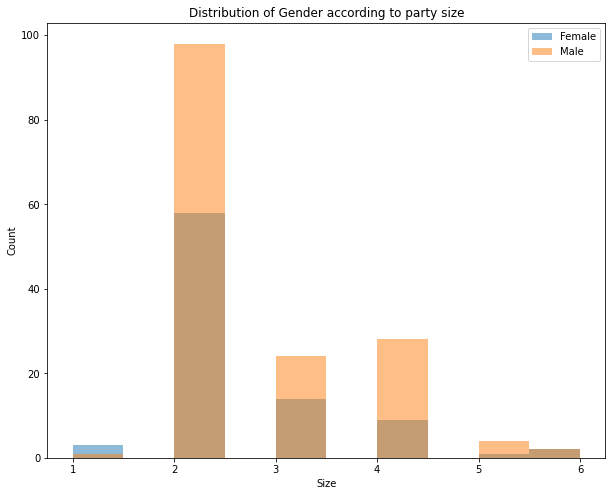

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df_F['size'], alpha=0.5, label='Female')
ax.hist(df_M['size'], alpha=0.5, label='Male')
ax.set_title("Distribution of Gender according to party size")
ax.set_xlabel("Size")
ax.set_ylabel("Count")
ax.legend(loc='upper right')
plt.show()


- This visual suggests there is a difference between the distribution of size for Male and Female gender
- We dont yet have the tools to conclude that the two distributions are different or whether the size definitely affects the gender
- However we can observe from summary statistics and these histograms that Male gender is larger in size than Female gender

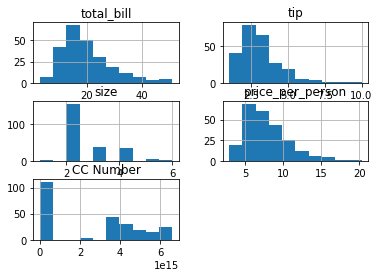

In [23]:
# Drawing Conclusions Quiz
# explore data
df.hist();

In [24]:
df.tail(20)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
224,13.42,1.58,Male,Yes,Fri,Lunch,2,6.71,Ronald Vaughn DVM,341503466406403,Fri5959
225,16.27,2.50,Female,Yes,Fri,Lunch,2,8.14,Whitney Arnold,3579111947217428,Fri6665
226,10.09,2.00,Female,Yes,Fri,Lunch,2,5.04,Ruth Weiss,5268689490381635,Fri6359
227,20.45,3.00,Male,No,Sat,Dinner,4,5.11,Robert Bradley,213141668145910,Sat4319
228,13.28,2.72,Male,No,Sat,Dinner,2,6.64,Glenn Jones,502061651712,Sat2937
229,22.12,2.88,Female,Yes,Sat,Dinner,2,11.06,Jennifer Russell,4793003293608,Sat3943
230,24.01,2.00,Male,Yes,Sat,Dinner,4,6.00,Michael Osborne,4258682154026,Sat7872
231,15.69,3.00,Male,Yes,Sat,Dinner,3,5.23,Jason Parks,4812333796161,Sat6334
232,11.61,3.39,Male,No,Sat,Dinner,2,5.80,James Taylor,6011482917327995,Sat2124
233,10.77,1.47,Male,No,Sat,Dinner,2,5.38,Paul Novak,6011698897610858,Sat1467


In [34]:
# total for the last rows on specific columns
df.iloc[240:, np.r_[0:2, 6:8]].sum()

total_bill          86.45
tip                  8.75
size                 8.00
price_per_person    43.23
dtype: float64

In [36]:
# average
df.mean(numeric_only=True)

total_bill          1.978594e+01
tip                 2.998279e+00
size                2.569672e+00
price_per_person    7.888197e+00
CC Number           2.563496e+15
dtype: float64